In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve

In [2]:
df=pd.read_csv('Healthcare_fraud.csv')
df.head()

,PotentialFraud,ClaimID,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,Age,Days_stayed_inhospital,Patient_visitType,DeadorNot,Days_to_settle_claim,Total_PhysiciansChecked,Repeted_Physician,TotalClmDiagnosisCount,TotalClmProcedureCount,TotalDiseaseCount
0,0,CLM272936,500,0.0,1,1,1,410,12,12,...,74.0,0.0,0.0,0.0,1,2,0.0,1,0,8
1,0,CLM58316,36000,1068.0,1,1,1,510,12,12,...,69.0,4.0,1.0,0.0,4,1,0.0,3,0,6
2,0,CLM52334,12000,1068.0,1,1,1,160,12,12,...,72.0,2.0,1.0,0.0,2,1,0.0,1,0,1
3,0,CLM452024,70,0.0,1,1,1,510,12,12,...,91.0,0.0,0.0,0.0,0,1,0.0,4,0,4
4,0,CLM36844,3000,1068.0,2,1,1,510,12,12,...,75.0,5.0,1.0,0.0,5,1,0.0,2,0,6


In [3]:
df.shape

(558211, 24)

In [4]:
df.isnull().sum()

PotentialFraud              0
ClaimID                     0
InscClaimAmtReimbursed      0
DeductibleAmtPaid           0
Gender                      0
Race                        0
State                       0
County                      0
NoOfMonths_PartACov         0
NoOfMonths_PartBCov         0
IPAnnualReimbursementAmt    0
IPAnnualDeductibleAmt       0
OPAnnualReimbursementAmt    0
OPAnnualDeductibleAmt       0
Age                         0
Days_stayed_inhospital      0
Patient_visitType           0
DeadorNot                   0
Days_to_settle_claim        0
Total_PhysiciansChecked     0
Repeted_Physician           0
TotalClmDiagnosisCount      0
TotalClmProcedureCount      0
TotalDiseaseCount           0
dtype: int64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23]),
 [Text(1, 0, 'PotentialFraud'),
  Text(2, 0, 'InscClaimAmtReimbursed'),
  Text(3, 0, 'DeductibleAmtPaid'),
  Text(4, 0, 'Gender'),
  Text(5, 0, 'Race'),
  Text(6, 0, 'State'),
  Text(7, 0, 'County'),
  Text(8, 0, 'NoOfMonths_PartACov'),
  Text(9, 0, 'NoOfMonths_PartBCov'),
  Text(10, 0, 'IPAnnualReimbursementAmt'),
  Text(11, 0, 'IPAnnualDeductibleAmt'),
  Text(12, 0, 'OPAnnualReimbursementAmt'),
  Text(13, 0, 'OPAnnualDeductibleAmt'),
  Text(14, 0, 'Age'),
  Text(15, 0, 'Days_stayed_inhospital'),
  Text(16, 0, 'Patient_visitType'),
  Text(17, 0, 'DeadorNot'),
  Text(18, 0, 'Days_to_settle_claim'),
  Text(19, 0, 'Total_PhysiciansChecked'),
  Text(20, 0, 'Repeted_Physician'),
  Text(21, 0, 'TotalClmDiagnosisCount'),
  Text(22, 0, 'TotalClmProcedureCount'),
  Text(23, 0, 'TotalDiseaseCount')])

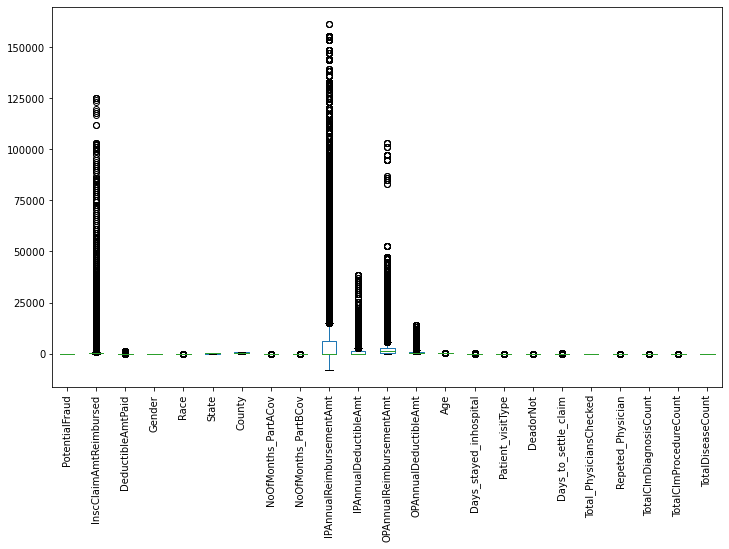

In [5]:
df.plot(kind='box',figsize=(12,7))
plt.xticks(rotation=90)

In [6]:
df.dtypes

PotentialFraud                int64
ClaimID                      object
InscClaimAmtReimbursed        int64
DeductibleAmtPaid           float64
Gender                        int64
Race                          int64
State                         int64
County                        int64
NoOfMonths_PartACov           int64
NoOfMonths_PartBCov           int64
IPAnnualReimbursementAmt      int64
IPAnnualDeductibleAmt         int64
OPAnnualReimbursementAmt      int64
OPAnnualDeductibleAmt         int64
Age                         float64
Days_stayed_inhospital      float64
Patient_visitType           float64
DeadorNot                   float64
Days_to_settle_claim          int64
Total_PhysiciansChecked       int64
Repeted_Physician           float64
TotalClmDiagnosisCount        int64
TotalClmProcedureCount        int64
TotalDiseaseCount             int64
dtype: object

## Train Test Split for K-Best Features

In [4]:
x=df[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov','IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'Days_to_settle_claim','TotalClmDiagnosisCount', 
      'TotalClmProcedureCount','TotalDiseaseCount','Total_PhysiciansChecked','Race','DeadorNot']]
y=df['PotentialFraud']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
print('xtrain',xtrain.shape)
print('ytrain',ytrain.shape)
print('xtest',xtest.shape)
print('ytest',ytest.shape)

xtrain (446568, 14)
ytrain (446568,)
xtest (111643, 14)
ytest (111643,)


In [5]:
from xverse.transformer import WOE

In [9]:
clf = WOE()
clf.fit(xtrain, ytrain)
xtrain = clf.transform(xtrain)
xtest = clf.transform(xtest)

lr = RandomForestClassifier(random_state=10)
lr.fit(xtrain,ytrain)

print("Training Accuracy")
print(lr.score(xtrain,ytrain))
print("Testing Accuracy")
print(lr.score(xtest,ytest))
predicted = lr.predict(xtest)
print(confusion_matrix(ytest,predicted))
print(classification_report(ytest,predicted))

# scoresdt = cross_val_score(lr,Xtrain,ytrain,cv=10,scoring='f1')
# print(scoresdt)
# print("Average f1")
# print(np.mean(scoresdt))

Training Accuracy
0.6405877716271654
Testing Accuracy
0.6172532088890481
[[64151  5073]
 [37658  4761]]
              precision    recall  f1-score   support

           0       0.63      0.93      0.75     69224
           1       0.48      0.11      0.18     42419

    accuracy                           0.62    111643
   macro avg       0.56      0.52      0.47    111643
weighted avg       0.57      0.62      0.53    111643



In [8]:
df.columns

Index(['PotentialFraud', 'ClaimID', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'Gender', 'Race', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'Days_stayed_inhospital', 'Patient_visitType', 'DeadorNot',
       'Days_to_settle_claim', 'Total_PhysiciansChecked', 'Repeted_Physician',
       'TotalClmDiagnosisCount', 'TotalClmProcedureCount',
       'TotalDiseaseCount'],
      dtype='object')

## Boosting Models

### 1. Adaboost model

In [37]:
ab=AdaBoostClassifier(random_state=10)
ab.fit(xtrain,ytrain)
ypred_ab=ab.predict(xtest)
print('Accuracy Score:',accuracy_score(ytest,ypred_ab))
print('Classification Report for AdaBoost Model:\n',classification_report(ytest,ypred_ab))

Accuracy Score: 0.623120123966572
Classification Report for AdaBoost Model:
               precision    recall  f1-score   support

           0       0.63      0.97      0.76     69224
           1       0.54      0.05      0.09     42419

    accuracy                           0.62    111643
   macro avg       0.58      0.51      0.43    111643
weighted avg       0.59      0.62      0.51    111643



### 2. Gradient Boosting Model

In [38]:
gb=GradientBoostingClassifier(random_state=10)
gb.fit(xtrain,ytrain)
ypred_gb=gb.predict(xtest)
print('Accuracy Score:',accuracy_score(ytest,ypred_gb))
print('Classification Report for Gradient Boosting Model:\n',classification_report(ytest,ypred_gb))

Accuracy Score: 0.6266492301353421
Classification Report for Gradient Boosting Model:
               precision    recall  f1-score   support

           0       0.63      0.95      0.76     69224
           1       0.55      0.10      0.16     42419

    accuracy                           0.63    111643
   macro avg       0.59      0.52      0.46    111643
weighted avg       0.60      0.63      0.53    111643



In [8]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15,8]

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score,cohen_kappa_score, confusion_matrix,classification_report, accuracy_score,f1_score
from sklearn.model_selection import train_test_split

In [8]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(xtrain,ytrain)

y_pred_dt = dt.predict(xtest)
y_train_dt = dt.predict(xtrain)
ypred_proba_dt = dt.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_dt))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_dt), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_dt))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_dt),'\n')

print(confusion_matrix(ytest,y_pred_dt),'\n')

print(classification_report(ytest,y_pred_dt))

Train Accuracy:  0.9713705415524624
Test Accuracy:  0.6223677256970881 

ROC-AUC Score:  0.6019552158301816
Cohen Cappa Score:  0.1968920336232599 

[[48368 20856]
 [21304 21115]] 

              precision    recall  f1-score   support

           0       0.69      0.70      0.70     69224
           1       0.50      0.50      0.50     42419

    accuracy                           0.62    111643
   macro avg       0.60      0.60      0.60    111643
weighted avg       0.62      0.62      0.62    111643



### 3. XG-Boost Model

In [9]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=10)
xgb.fit(xtrain,ytrain)

y_pred_xgb = xgb.predict(xtest)
y_train_xgb = xgb.predict(xtrain)

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_xgb))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_xgb), '\n\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,y_pred_xgb))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_xgb),'\n\n')

print(classification_report(ytest,y_pred_xgb))

[16:38:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy:  0.6440094229770158
Test Accuracy:  0.6343613123975529 


ROC-AUC Score:  0.5363671539857882
Cohen Cappa Score:  0.08569624442047508 


              precision    recall  f1-score   support

           0       0.64      0.94      0.76     69224
           1       0.59      0.13      0.21     42419

    accuracy                           0.63    111643
   macro avg       0.61      0.54      0.49    111643
weighted avg       0.62      0.63      0.55    111643



In [39]:
xg=XGBClassifier(random_state=10)
xg.fit(xtrain,ytrain)
ypred_xg=xg.predict(xtest)
print('Accuracy Score:',accuracy_score(ytest,ypred_xg))
print('Classification Report for XG-Boost Model:\n',classification_report(ytest,ypred_xg))

D:\DatascienceSoftwares\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.6343613123975529
Classification Report for XG-Boost Model:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76     69224
           1       0.59      0.13      0.21     42419

    accuracy                           0.63    111643
   macro avg       0.61      0.54      0.49    111643
weighted avg       0.62      0.63      0.55    111643



In [12]:
x=df.drop(['ClaimID','PotentialFraud'],axis=1)
y=df['PotentialFraud']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
print('xtrain',xtrain.shape)
print('ytrain',ytrain.shape)
print('xtest',xtest.shape)
print('ytest',ytest.shape)

xtrain (446568, 22)
ytrain (446568,)
xtest (111643, 22)
ytest (111643,)


In [13]:
xg=XGBClassifier(random_state=10)
xg.fit(xtrain,ytrain)
ypred_xg=xg.predict(xtest)
print('Accuracy Score:',accuracy_score(ytest,ypred_xg))
print('Classification Report for XG-Boost Model:\n',classification_report(ytest,ypred_xg))

D:\DatascienceSoftwares\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:03:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.7674999776071944
Classification Report for XG-Boost Model:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82     69224
           1       0.73      0.61      0.67     42419

    accuracy                           0.77    111643
   macro avg       0.76      0.74      0.74    111643
weighted avg       0.76      0.77      0.76    111643



In [14]:
f_imp=pd.DataFrame(xg.feature_importances_,index=xtrain.columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
f_imp.head(15)

,Importance
Patient_visitType,0.345781
State,0.149931
County,0.124607
Repeted_Physician,0.099451
Total_PhysiciansChecked,0.084264
DeductibleAmtPaid,0.035373
Days_stayed_inhospital,0.025469
TotalClmProcedureCount,0.019267
NoOfMonths_PartBCov,0.010491
InscClaimAmtReimbursed,0.009449


In [15]:
df.columns

Index(['PotentialFraud', 'ClaimID', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'Gender', 'Race', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'Days_stayed_inhospital', 'Patient_visitType', 'DeadorNot',
       'Days_to_settle_claim', 'Total_PhysiciansChecked', 'Repeted_Physician',
       'TotalClmDiagnosisCount', 'TotalClmProcedureCount',
       'TotalDiseaseCount'],
      dtype='object')

## Train Test split for top 15 Feature Importance taken from XG-Boost

In [16]:
x=df[['Patient_visitType','State', 'County','Repeted_Physician','Total_PhysiciansChecked','DeductibleAmtPaid',
      'Days_stayed_inhospital','TotalClmProcedureCount','NoOfMonths_PartBCov','InscClaimAmtReimbursed','OPAnnualDeductibleAmt',
      'OPAnnualReimbursementAmt','IPAnnualReimbursementAmt','Age','IPAnnualDeductibleAmt']]
y=df['PotentialFraud']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
print('xtrain',xtrain.shape)
print('ytrain',ytrain.shape)
print('xtest',xtest.shape)
print('ytest',ytest.shape)

xtrain (446568, 15)
ytrain (446568,)
xtest (111643, 15)
ytest (111643,)


In [17]:
xg=XGBClassifier(random_state=10)
xg.fit(xtrain,ytrain)
ypred_xg=xg.predict(xtest)
print('Accuracy Score:',accuracy_score(ytest,ypred_xg))
print('Classification Report for XG-Boost Model:\n',classification_report(ytest,ypred_xg))

D:\DatascienceSoftwares\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.7693451447918813
Classification Report for XG-Boost Model:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82     69224
           1       0.74      0.61      0.67     42419

    accuracy                           0.77    111643
   macro avg       0.76      0.74      0.75    111643
weighted avg       0.77      0.77      0.76    111643



## Train Test split for top 5 Feature Importance taken from XG-Boost

In [18]:
x=df[['Patient_visitType','State', 'County','Repeted_Physician','Total_PhysiciansChecked']]
y=df['PotentialFraud']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
print('xtrain',xtrain.shape)
print('ytrain',ytrain.shape)
print('xtest',xtest.shape)
print('ytest',ytest.shape)

xtrain (446568, 5)
ytrain (446568,)
xtest (111643, 5)
ytest (111643,)


In [19]:
xg=XGBClassifier(random_state=10)
xg.fit(xtrain,ytrain)
ypred_xg=xg.predict(xtest)
print('Accuracy Score:',accuracy_score(ytest,ypred_xg))
print('Classification Report for XG-Boost Model:\n',classification_report(ytest,ypred_xg))

D:\DatascienceSoftwares\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.7783560097811775
Classification Report for XG-Boost Model:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83     69224
           1       0.74      0.64      0.69     42419

    accuracy                           0.78    111643
   macro avg       0.77      0.75      0.76    111643
weighted avg       0.78      0.78      0.77    111643



## Confusion matrix for Top 5 features

In [20]:
cm_5=confusion_matrix(ytest,ypred_xg)
cm_5

array([[59868,  9356],
       [15389, 27030]], dtype=int64)

<AxesSubplot:>

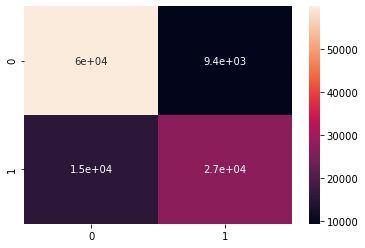

In [21]:
sns.heatmap(cm_5,annot=True)

## Hyper parameter tuning

In [22]:
params={'n_estimators':[7,8,9,10,100,200],
       'max_depth':[4,5,6]}
xgb=XGBClassifier(random_state=10)
xgbcv=GridSearchCV(estimator=xgb,param_grid=params,cv=10,scoring='accuracy',n_jobs=-1)
xgbcv.fit(xtrain,ytrain)
xgbcv.best_params_

D:\DatascienceSoftwares\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:24:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'max_depth': 6, 'n_estimators': 200}

## Final_model

In [24]:
xg=XGBClassifier(n_estimators=300,max_depth=6,random_state=10)
xg.fit(xtrain,ytrain)
ypred_xg=xg.predict(xtest)
print('Accuracy Score:',accuracy_score(ytest,ypred_xg))
print('Classification Report for XG-Boost Model:\n',classification_report(ytest,ypred_xg))

D:\DatascienceSoftwares\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.7870712897360336
Classification Report for XG-Boost Model:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83     69224
           1       0.75      0.67      0.70     42419

    accuracy                           0.79    111643
   macro avg       0.78      0.76      0.77    111643
weighted avg       0.78      0.79      0.78    111643



### As we can see by taking Top 5 feature importances from XG Boost model we got model accuracy of 79%.

## Confusion matrix After tuning XG-Boost Model.

In [25]:
cm_t=confusion_matrix(ytest,ypred_xg)
cm_t

array([[59605,  9619],
       [14153, 28266]], dtype=int64)

<AxesSubplot:>

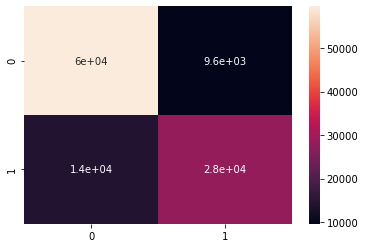

In [26]:
sns.heatmap(cm_t,annot=True)

## ROC-Curve

In [30]:
ypred_prob_xg=xg.predict_proba(xtest)[:,1]
ypred_prob_xg

array([0.19819659, 0.07071607, 0.16865961, ..., 0.23352754, 0.56146723,
       0.03033177], dtype=float32)

Text(0, 0.5, 'tpr')

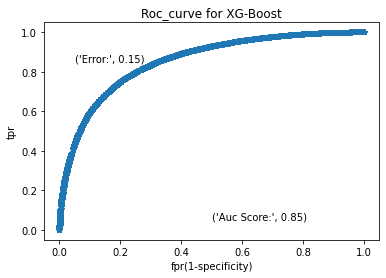

In [35]:
fpr,tpr,threshold=roc_curve(ytest,ypred_prob_xg)

plt.plot(fpr,tpr,marker='*')
plt.title('Roc_curve for XG-Boost')
plt.text(x=0.5,y=0.05,s=('Auc Score:',round(roc_auc_score(ytest,ypred_prob_xg),2)))
plt.text(x=0.05,y=0.85,s=('Error:',0.15))
plt.xlabel('fpr(1-specificity)')
plt.ylabel('tpr')

#######################################################################



## Below code i have  build XG-Boost model  for k-Best Features(14).

#### As we can see among all the boosting models XG Boost is giving the accuracy of 63%.
#### So we take this XG Boost model and try to fine tune the model with all required hyperparameters,inorder to improve my 'Accuracy' of the model.

In [84]:
# Before that we will check for the False negatives whether it is reduced or not.
# Because our main aim here is to reduce the False negative.

In [85]:
cm_ab=confusion_matrix(ytest,ypred_ab)
cm_ab

array([[67407,  1817],
       [40259,  2160]], dtype=int64)

<AxesSubplot:>

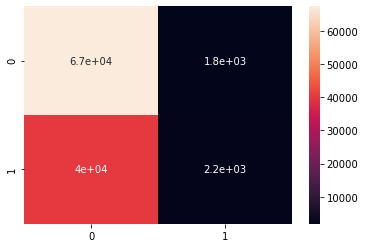

In [86]:
sns.heatmap(cm_ab,annot=True)

In [87]:
cm_gb=confusion_matrix(ytest,ypred_gb)
cm_gb

array([[65853,  3371],
       [38311,  4108]], dtype=int64)

<AxesSubplot:>

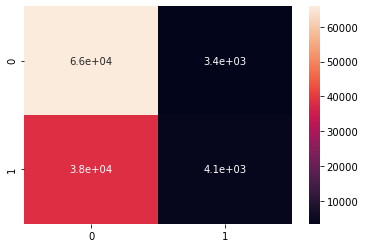

In [88]:
sns.heatmap(cm_gb,annot=True)

In [89]:
cm_xg=confusion_matrix(ytest,ypred_xg)
cm_xg

array([[65383,  3841],
       [36980,  5439]], dtype=int64)

<AxesSubplot:>

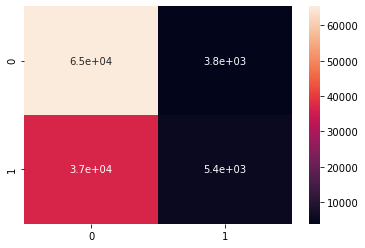

In [90]:
sns.heatmap(cm_xg,annot=True)

In [91]:
# Now we will tune our XG-Boost Model.

## Hyperparameter Tuning for XG Boost Model.

In [92]:
params={'n_estimators':[7,8,9,10],
       'max_depth':[4,5,6]}
xgb=XGBClassifier(random_state=10)
xgbcv=GridSearchCV(estimator=xgb,param_grid=params,cv=10,scoring='accuracy',n_jobs=-1)
xgbcv.fit(xtrain,ytrain)
xgbcv.best_params_

D:\DatascienceSoftwares\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'max_depth': 6, 'n_estimators': 10}

In [97]:
xg=XGBClassifier(n_estimators=1000,max_depth=6,random_state=10,learning_rate=1)
xg.fit(xtrain,ytrain)
ypred_xg=xg.predict(xtest)
print('Accuracy Score:',accuracy_score(ytest,ypred_xg))
print('Classification Report for XG-Boost Model:\n',classification_report(ytest,ypred_xg))

D:\DatascienceSoftwares\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.6619671631898104
Classification Report for XG-Boost Model:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75     69224
           1       0.58      0.41      0.48     42419

    accuracy                           0.66    111643
   macro avg       0.64      0.61      0.61    111643
weighted avg       0.65      0.66      0.65    111643



In [98]:
# So far i checked with all the other hyperparmeters to tune the model for getting best accuracy.
# But still im getting the Highest accuracy of 66%.
# So Above all tunining done for  model(XG Boost) that it is giving the  accuracy of 66%.

In [40]:
ypred_prob_ab=ab.predict_proba(xtest)[:,1]
ypred_prob_ab

array([0.49637967, 0.49734396, 0.49740262, ..., 0.49735351, 0.49713439,
       0.49714256])

In [41]:
fpr,tpr,threshold=roc_curve(ytest,ypred_prob_ab)

Text(0, 0.5, 'tpr')

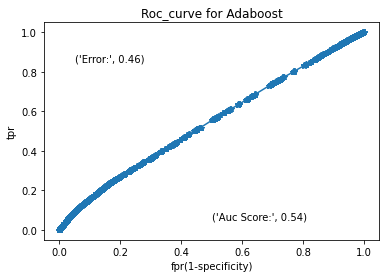

In [43]:
plt.plot(fpr,tpr,marker='*')
plt.title('Roc_curve for Adaboost')
plt.text(x=0.5,y=0.05,s=('Auc Score:',round(roc_auc_score(ytest,ypred_prob_ab),2)))
plt.text(x=0.05,y=0.85,s=('Error:',0.46))
plt.xlabel('fpr(1-specificity)')
plt.ylabel('tpr')

In [44]:
ypred_prob_gb=gb.predict_proba(xtest)[:,1]
ypred_prob_gb

array([0.34036627, 0.36739296, 0.36601587, ..., 0.37546838, 0.36408678,
       0.37415504])

In [45]:
fpr,tpr,threshold=roc_curve(ytest,ypred_prob_gb)

Text(0, 0.5, 'tpr')

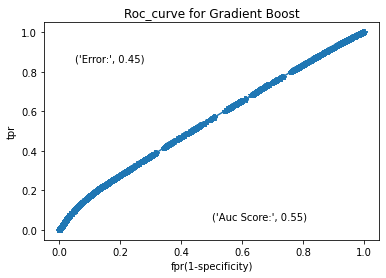

In [47]:
plt.plot(fpr,tpr,marker='*')
plt.title('Roc_curve for Gradient Boost')
plt.text(x=0.5,y=0.05,s=('Auc Score:',round(roc_auc_score(ytest,ypred_prob_gb),2)))
plt.text(x=0.05,y=0.85,s=('Error:',0.45))
plt.xlabel('fpr(1-specificity)')
plt.ylabel('tpr')

In [48]:
ypred_prob_xg=xg.predict_proba(xtest)[:,1]
ypred_prob_xg

array([0.3426898 , 0.36595336, 0.3880626 , ..., 0.36671597, 0.3674104 ,
       0.3456061 ], dtype=float32)

In [49]:
fpr,tpr,threshold=roc_curve(ytest,ypred_prob_xg)

Text(0, 0.5, 'tpr')

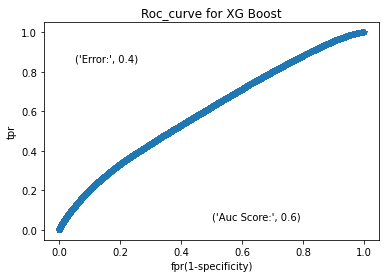

In [51]:
plt.plot(fpr,tpr,marker='*')
plt.title('Roc_curve for XG Boost')
plt.text(x=0.5,y=0.05,s=('Auc Score:',round(roc_auc_score(ytest,ypred_prob_xg),2)))
plt.text(x=0.05,y=0.85,s=('Error:',0.40))
plt.xlabel('fpr(1-specificity)')
plt.ylabel('tpr')